In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.image as img

C:\Users\mural\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df_main = pd.read_csv('TA_restaurants_curated.csv')

In [3]:
df_main.head()

,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,Martine of Martine's Table,Amsterdam,"['French', 'Dutch', 'European']",1.0,5.0,$$ - $$$,136.0,"[['Just like home', 'A Warm Welcome to Wintry ...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080
1,De Silveren Spiegel,Amsterdam,"['Dutch', 'European', 'Vegetarian Friendly', '...",2.0,4.5,$$$$,812.0,"[['Great food and staff', 'just perfect'], ['0...",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419
2,La Rive,Amsterdam,"['Mediterranean', 'French', 'International', '...",3.0,4.5,$$$$,567.0,"[['Satisfaction', 'Delicious old school restau...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959
3,Vinkeles,Amsterdam,"['French', 'European', 'International', 'Conte...",4.0,5.0,$$$$,564.0,"[['True five star dinner', 'A superb evening o...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229
4,Librije's Zusje Amsterdam,Amsterdam,"['Dutch', 'European', 'International', 'Vegeta...",5.0,4.5,$$$$,316.0,"[['Best meal.... EVER', 'super food experience...",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170


In [4]:
df = df_main.copy()

In [5]:
#renaming the columns replacing ' ' with '_'.
df.rename(columns = {'Name':'name','City':'city','Cuisine Style':'cuisine_style','Ranking':'ranking',
                  'Price Range':'price_range','Number of Reviews':'no_of_reviews',
                  'Reviews':'reviews','URL_TA':'url_ta','ID_TA':'id_ta','Rating':'rating'},
                 inplace = True)

In [6]:
df.columns

Index(['name', 'city', 'cuisine_style', 'ranking', 'rating', 'price_range',
       'no_of_reviews', 'reviews', 'url_ta', 'id_ta'],
      dtype='object')

In [7]:
df.shape

(125527, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125527 entries, 0 to 125526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name           125527 non-null  object 
 1   city           125527 non-null  object 
 2   cuisine_style  94176 non-null   object 
 3   ranking        115876 non-null  float64
 4   rating         115897 non-null  float64
 5   price_range    77672 non-null   object 
 6   no_of_reviews  108183 non-null  float64
 7   reviews        115911 non-null  object 
 8   url_ta         125527 non-null  object 
 9   id_ta          125527 non-null  object 
dtypes: float64(3), object(7)
memory usage: 9.6+ MB


In [9]:
df.isnull().sum().sort_values(ascending = False)

price_range      47855
cuisine_style    31351
no_of_reviews    17344
ranking           9651
rating            9630
reviews           9616
id_ta                0
url_ta               0
city                 0
name                 0
dtype: int64

### Observations:

1. price_range,cuisine_style,no_of_reviews,rating has high number of null values.
2. The Cuisine column contains special characters such as [, ], ' and each restaraunt could have more than one cuisine.
3. Review column has two reviews and the date when the review was given in a string that contains list of lists.

In [10]:
'''Renaming the unique values in price_range column in the following way
    '$' - 'cheap'
    '$$ - $$$' - 'medium'
    '$$$$' - 'high'
'''

df['price_range'] = df['price_range'].map({'$':'cheap',
                                          '$$ - $$$':'medium',
                                          '$$$$':'high',
                                          })

df['price_range'].fillna('NA',inplace = True)
df['price_range'] = df['price_range'].astype('category')

In [11]:
#converting every review in review column into a list of words.
def review_to_words(review):
    review = re.findall(r'[a-zA-Z]+',review)
    review = [i.lower() for i in review]
    
    return review

In [12]:
df['reviews'] = df['reviews'].fillna('NA')
df['reviews'] = df.apply(lambda row : review_to_words(row['reviews']),axis = 1)

In [13]:
#adding a column which contains the word count of reviews.
df['review_count'] = df.apply(lambda row: len(row['reviews']),axis = 1)

In [14]:
#processing rating column.
df['rating'].unique()

array([ 5. ,  4.5,  4. ,  3.5,  3. ,  2.5,  2. ,  1.5,  1. , -1. ,  nan])

In [15]:
#replacing '-1' in rating with '0' since rating cannot be negative.
df['rating'] = df['rating'].replace(to_replace = -1,
                                   value = 0)

#converting rating column into type category.
df['rating'] = df['rating'].astype('category')


#filling the null values in reviews with zero
df['rating'] = df['rating'].fillna(0)


In [16]:
#filling the null values in no_of_reviews.
df['no_of_reviews'].fillna(0, inplace = True)

In [17]:
#converting data in cuisine_style column into a list of cusines.
def cuisine_process(cuisine):
    if type(cuisine) != type('s'):
        return 'Not Available'
    else:
        cuisine = cuisine.replace('[','')
        cuisine = cuisine.replace(']','')
        cuisine_list = []
        for i in cuisine.split(', '):
            cuisine_list.append(i.replace("\'",''))
        
        return cuisine_list

In [18]:
df['cuisine_style'] = df.apply(lambda row: cuisine_process(row['cuisine_style']), axis = 1)

In [19]:
df.isnull().sum()

name                0
city                0
cuisine_style       0
ranking          9651
rating              0
price_range         0
no_of_reviews       0
reviews             0
url_ta              0
id_ta               0
review_count        0
dtype: int64

### Plotting

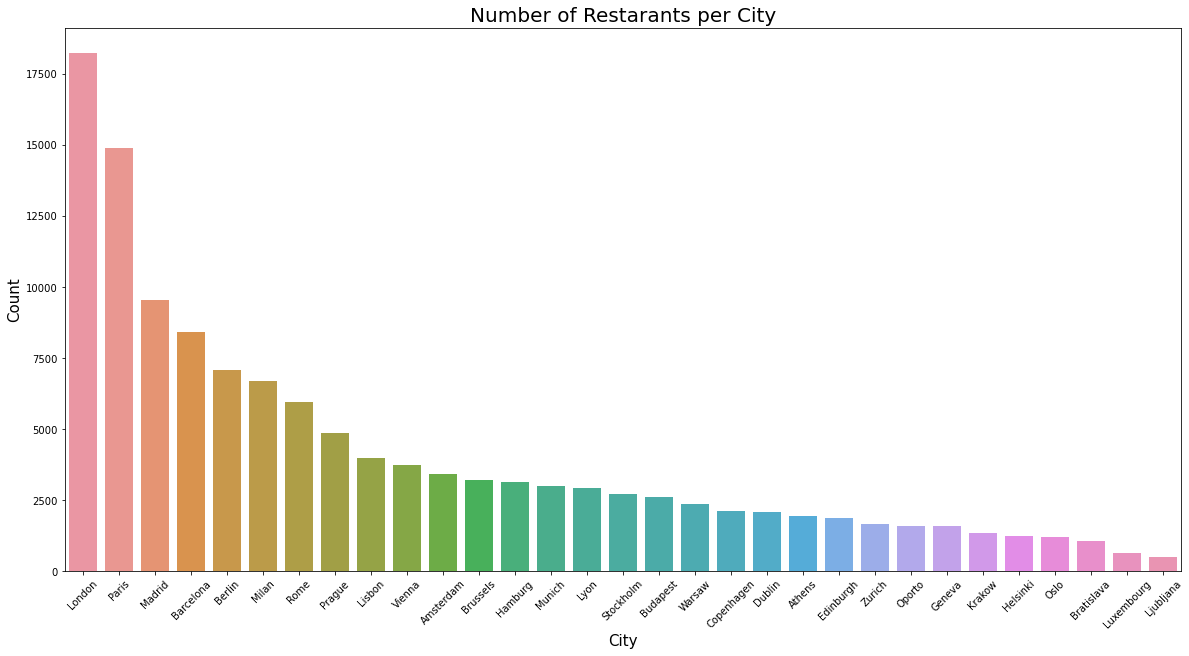

In [20]:
number_of_restaurants_per_city = df.groupby('city').name.count().sort_values(ascending = False)

plt.figure(figsize = (20,10))
sns.barplot(x = number_of_restaurants_per_city.index , y = number_of_restaurants_per_city.values)
plt.xticks(rotation = 45)
plt.xlabel('City', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Number of Restarants per City', size = 20)
plt.show()

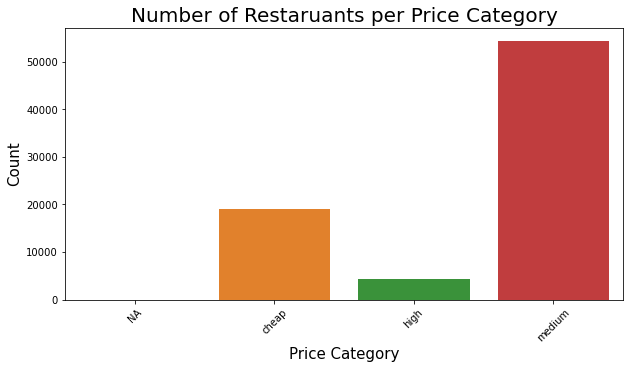

In [21]:
df_price = df[df.price_range != 'NA']
number_of_restaurants_per_price_range = df_price.groupby('price_range').price_range.count().sort_values(ascending = False)

plt.figure(figsize = (10,5))
sns.barplot(x = number_of_restaurants_per_price_range.index , y = number_of_restaurants_per_price_range.values )
plt.xticks(rotation = 45)
plt.xlabel('Price Category', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Number of Restaruants per Price Category', size = 20)
plt.show()

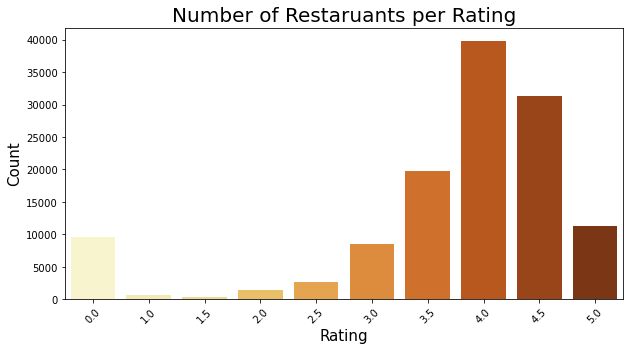

In [22]:
number_of_restaurants_per_rating = df.groupby('rating').name.count().sort_values(ascending = False)

plt.figure(figsize = (10,5))
sns.barplot(x = number_of_restaurants_per_rating.index , y = number_of_restaurants_per_rating.values, palette = 'YlOrBr')
plt.xticks(rotation = 45)
plt.xlabel('Rating', size = 15)
plt.ylabel('Count', size = 15)
plt.title('Number of Restaruants per Rating', size = 20)
plt.show()

### Observations:

1. London,Paris, Madrid are the top 3 place with highest number of restaurants.
2. Medium Price category are the highest number.
3. Number of Restaurants with rating less than 3 are very low compared with restaurants having rating greater than 3. 

In [23]:
#creating a cuisine_list with unique cuisines.
cuisine_list = []
for row in df['cuisine_style']:
    if row == 'Not Available':
        continue
    else:
        for cuisine in row:
            if cuisine not in cuisine_list:
                cuisine_list.append(cuisine)
cuisine_list.append('Not Avaliable')

In [24]:
#creating a dictionary with the count of cuisines across all the restaurants.
cuisine_values = np.zeros_like(cuisine_list,dtype = int)

cuisine_dict = dict(zip(cuisine_list,cuisine_values))

for row in df['cuisine_style']:
    if row == 'Not Available':
        cuisine_dict['Not Avaliable'] += 1
    else:
        for cuisine in row:
            cuisine_dict[cuisine]+=1


In [25]:
#creating a dataframe 
cuisines = pd.DataFrame(data = list(cuisine_dict.items()), columns=['cuisine','count'])
#sorting the dictionary
cuisines.sort_values(by = 'count', inplace = True,ascending = False)

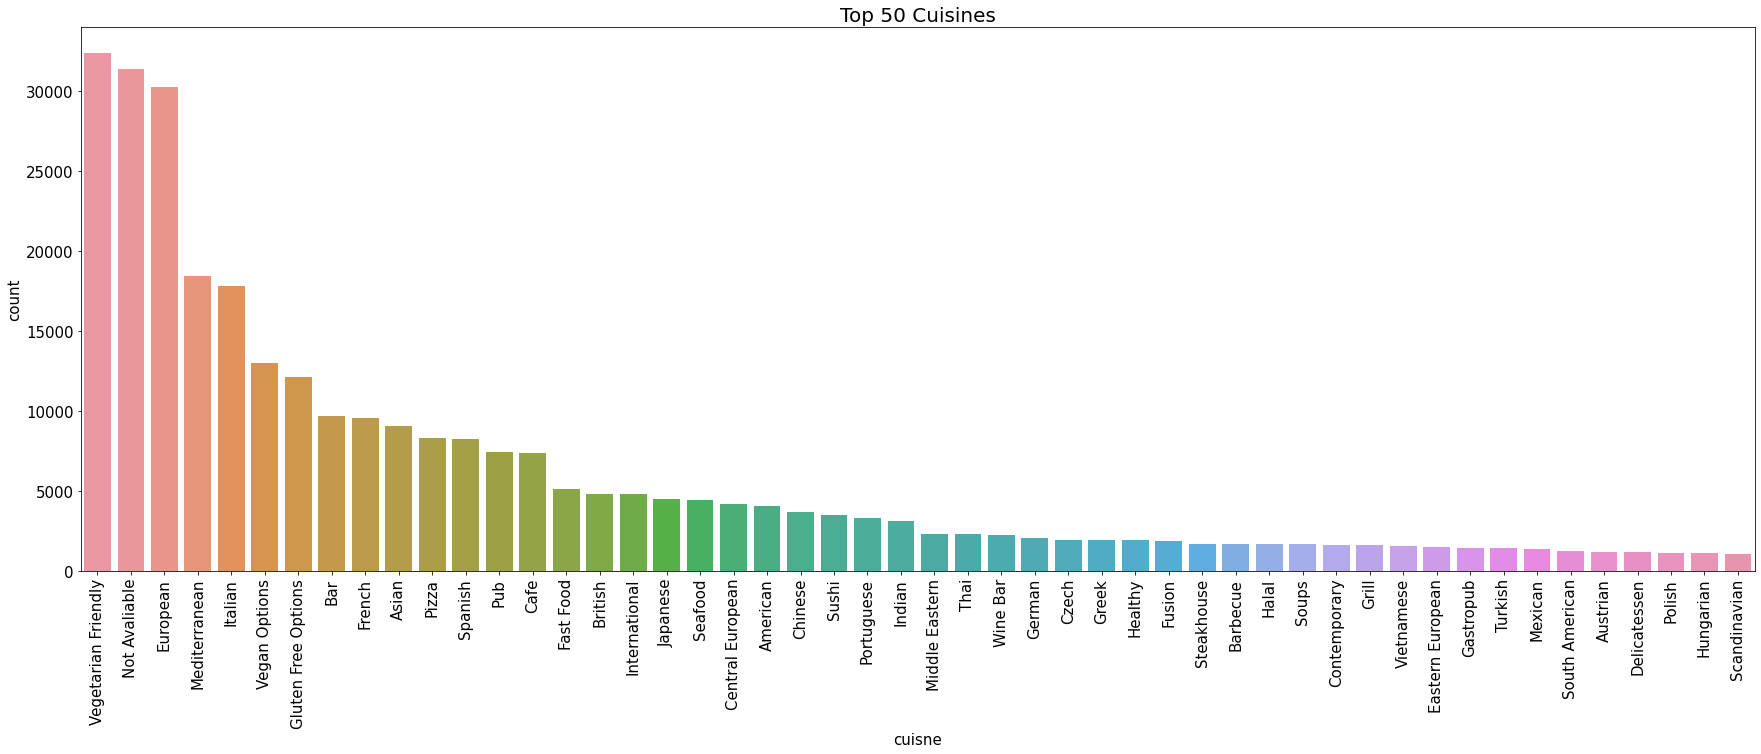

In [26]:
plt.figure(figsize = (30,10))
sns.barplot(x = cuisines['cuisine'][:50] , y = cuisines['count'][:50])
plt.xlabel('cuisne',size = 15)
plt.ylabel('count', size = 15)
plt.xticks(rotation = 90, size= 15)
plt.yticks(size = 15)
plt.title('Top 50 Cuisines', size = 20)
plt.show()

### Obsevations:

1. Vegetarian Friendly is the top served cuisine.
2. Cuisines offered by almost 30k restaurants is not available.

In [27]:
#adding a new column to the dataframe
df['no_of_cuisines_offered'] = df.apply(lambda row: len(row['cuisine_style']) if row['cuisine_style'] != 'Not Available' else 0, axis = 1)

In [28]:
df.head()

,name,city,cuisine_style,ranking,rating,price_range,no_of_reviews,reviews,url_ta,id_ta,review_count,no_of_cuisines_offered
0,Martine of Martine's Table,Amsterdam,"[French, Dutch, European]",1.0,5.0,medium,136.0,"[just, like, home, a, warm, welcome, to, wintr...",/Restaurant_Review-g188590-d11752080-Reviews-M...,d11752080,9,3
1,De Silveren Spiegel,Amsterdam,"[Dutch, European, Vegetarian Friendly, Gluten ...",2.0,4.5,high,812.0,"[great, food, and, staff, just, perfect]",/Restaurant_Review-g188590-d693419-Reviews-De_...,d693419,6,4
2,La Rive,Amsterdam,"[Mediterranean, French, International, Europea...",3.0,4.5,high,567.0,"[satisfaction, delicious, old, school, restaur...",/Restaurant_Review-g188590-d696959-Reviews-La_...,d696959,5,6
3,Vinkeles,Amsterdam,"[French, European, International, Contemporary...",4.0,5.0,high,564.0,"[true, five, star, dinner, a, superb, evening,...",/Restaurant_Review-g188590-d1239229-Reviews-Vi...,d1239229,11,7
4,Librije's Zusje Amsterdam,Amsterdam,"[Dutch, European, International, Vegetarian Fr...",5.0,4.5,high,316.0,"[best, meal, ever, super, food, experience]",/Restaurant_Review-g188590-d6864170-Reviews-Li...,d6864170,6,6


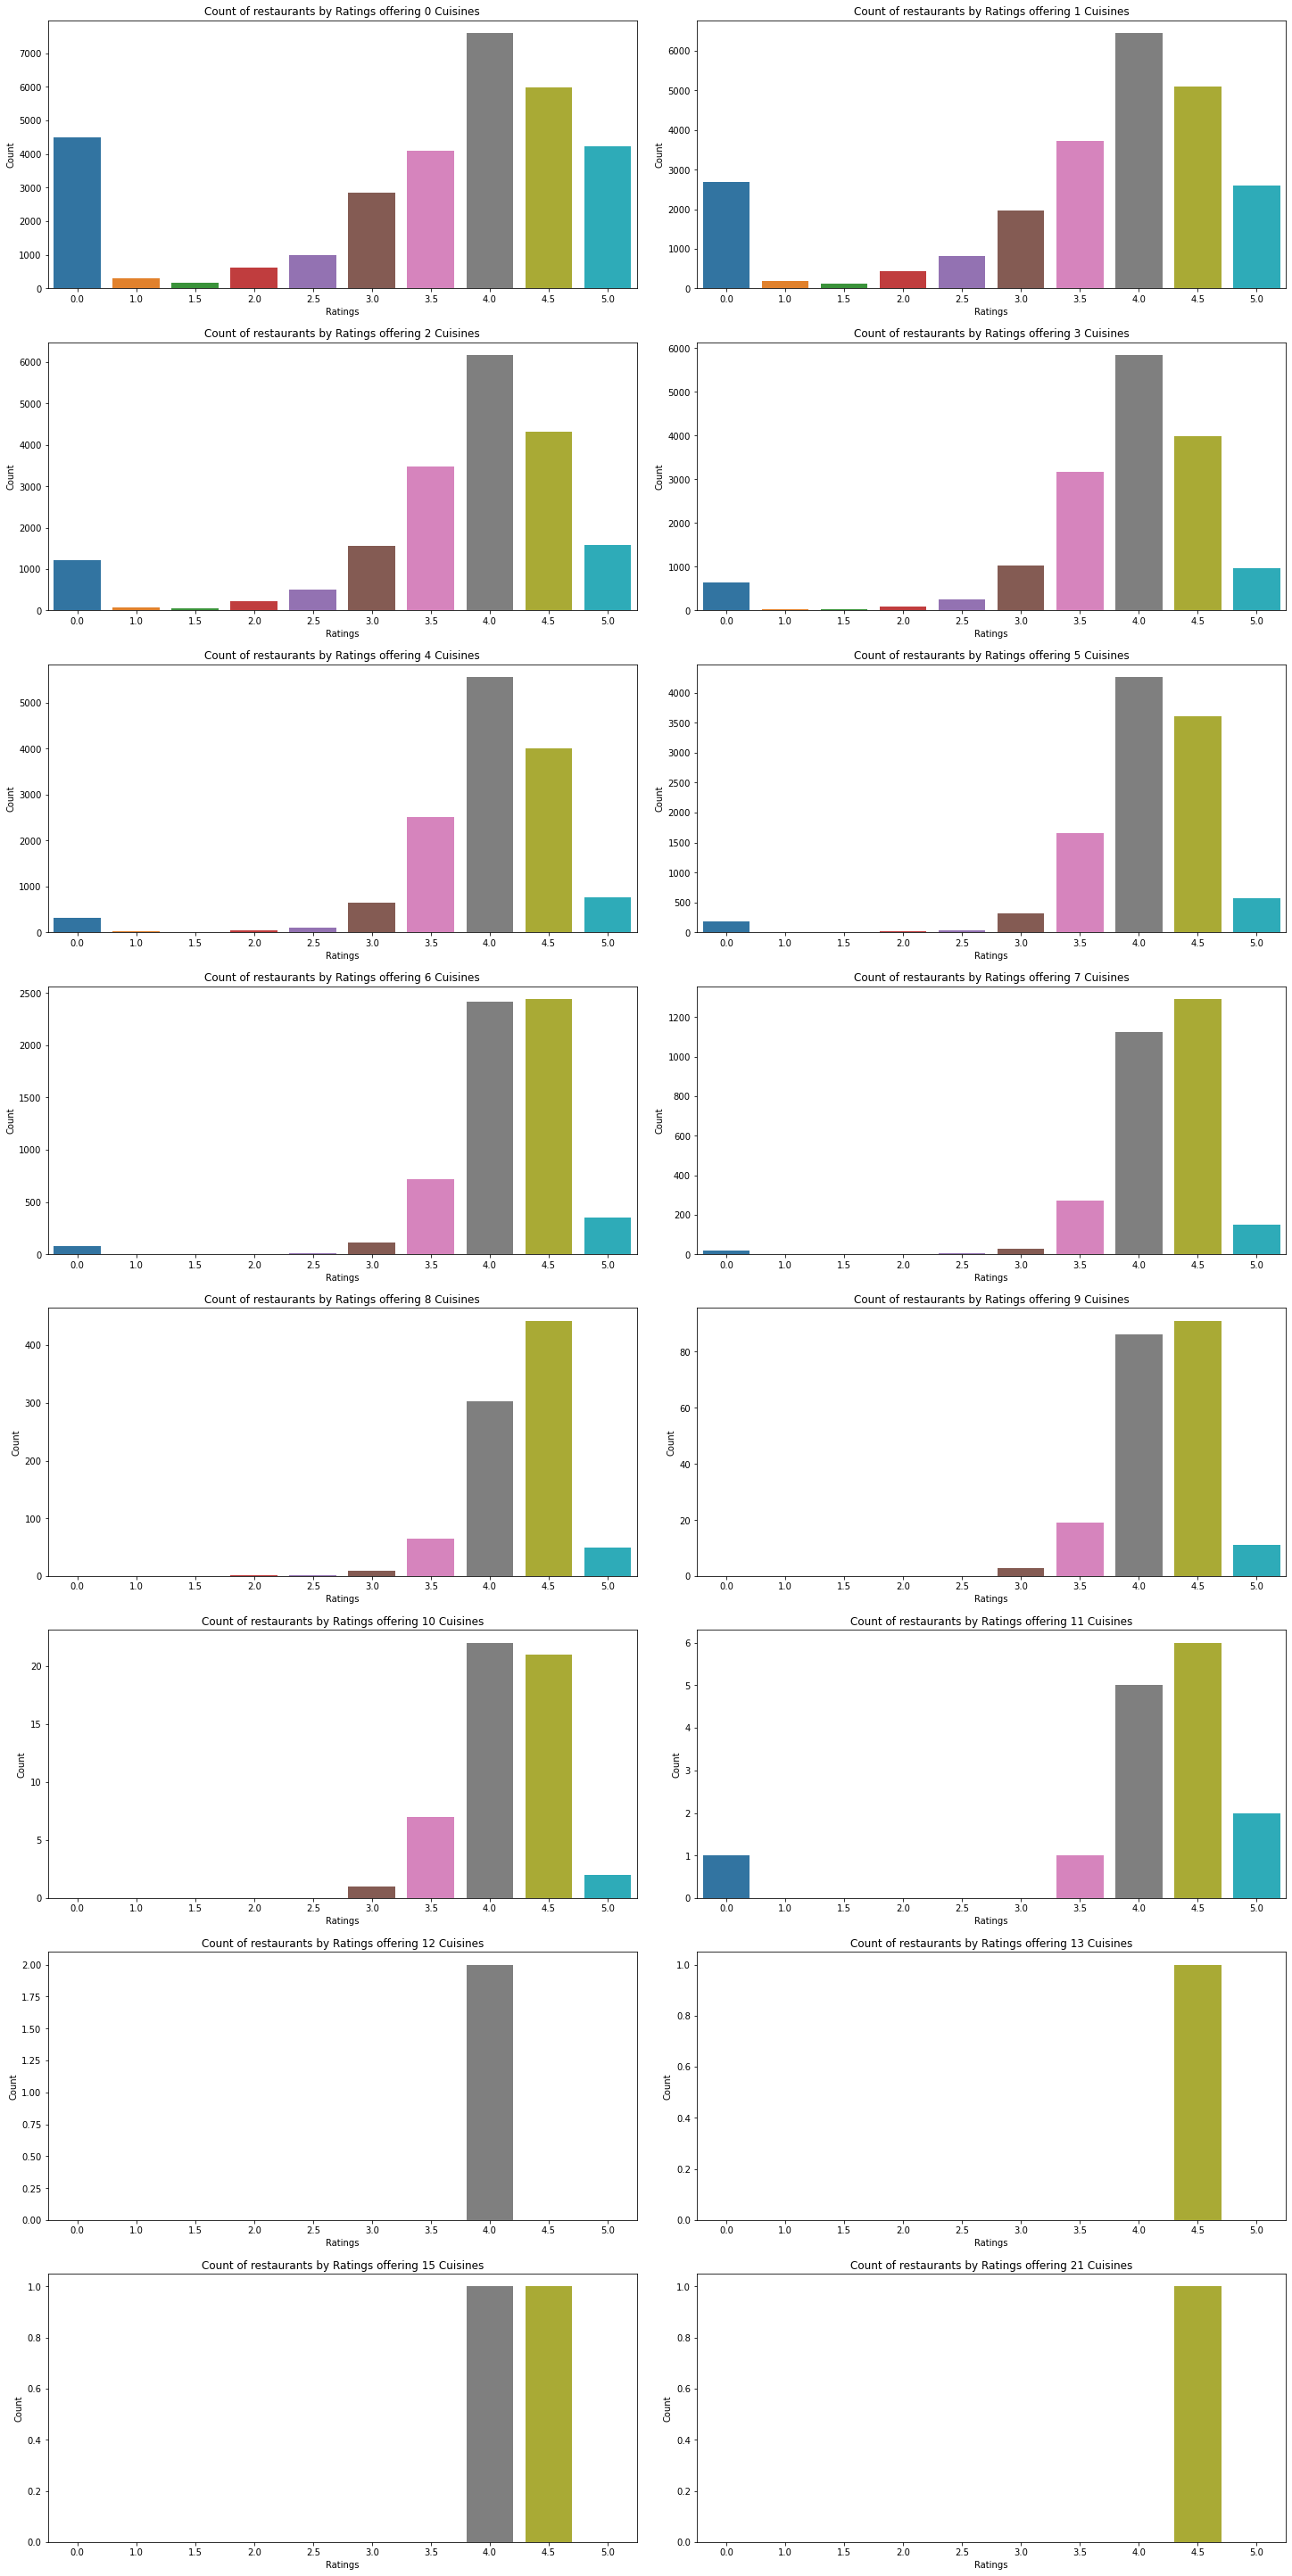

In [29]:
unique = list(df['no_of_cuisines_offered'].unique())
unique.sort()

fig, axs = plt.subplots(nrows=8, ncols=2,
                        figsize=(20, 40), constrained_layout=True)
for i, var in enumerate(unique):
    row = i//2
    pos = i % 2
    sns.barplot(x = df[df['no_of_cuisines_offered'] == unique[i]]['rating'].value_counts().index,
                y = df[df['no_of_cuisines_offered'] == unique[i]]['rating'].value_counts(),
                ax=axs[row][pos]
                ).set(title = 'Count of restaurants by Ratings offering ' + str(unique[i]) + ' Cuisines',
                     xlabel = 'Ratings',
                     ylabel = 'Count')

### Observations:

1. We can see that as the number of cuisines offered by the restaurant increases the Count of the restaurants below rating 3 decreases. This implies that higher the number of cuisines offered, lesser the probability of low rating.

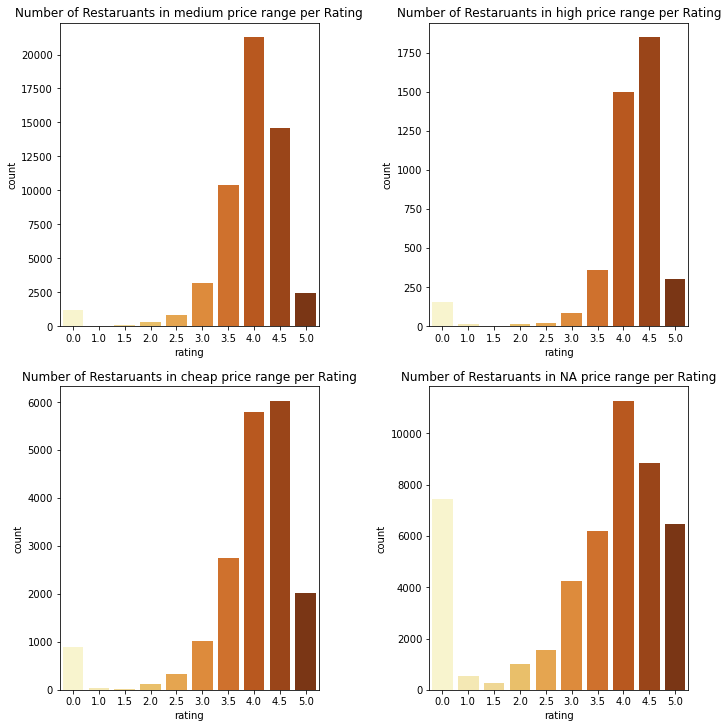

In [83]:
unique_price_range = list(df['price_range'].unique())

fig, axs = plt.subplots(nrows=2, ncols=2,
                        figsize=(10,10), constrained_layout=True)
for i, var in enumerate(unique_price_range):
    row = i//2
    pos = i % 2
    df_price_range = df[df['price_range'] == var]
    
    number_of_restaurants_per_price_range_per_rating = df_price_range.groupby('rating').city.count().sort_values(ascending = False)
    
    sns.barplot(x = number_of_restaurants_per_price_range_per_rating.index , 
                y = number_of_restaurants_per_price_range_per_rating.values,
                palette = 'YlOrBr',
               ax = axs[row][pos]).set(title = 'Number of Restaruants in '+ str(var) + ' price range per Rating',
                                xlabel = 'rating',
                                ylabel = 'count')

* Distribution of rating across all the price_ranges looks the same.
* Null values cannot be dropped because it leads to treamendous data loss.